## The .ipynb file provides a method for calculating the spatial complexity (parameter size), the time complexity (flops) and the architecture visualization of the model.
## The model architecture is stored in the format of the file .JPG file in the file folder of '/models/Visualization'

### Note: For the rnn layers (LSTM/BiLSTM/GRU/BiGRU) in the model, the keras_flops library does not provide a calculation method. Therefore, we will estimate the flops of the rnn layer by the simplified formula
1. total_lstm_flops = num_time_steps * lstm_flops_per_step = num_time_steps * (4 * (input_size + hidden_size) * hidden_size)
2. total_gru_flops = num_time_steps * gru_flops_per_step = num_time_steps * (3 * (input_size + hidden_size) * hidden_size)
3. Our implementation can be found in 'utils.rnn_flops.get_rnn_flops'.

In [1]:
import os
from keras.utils.vis_utils import plot_model
from keras_flops import get_flops
from utils.rnn_flops import get_rnn_flops
from utils.tools import make_dir

Summary of model-CNN-BiLSTM-SA: 
Model: "CNN-BiLSTM-SA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Inputs (InputLayer)            [(None, 256, 4)]     0           []                               
                                                                                                  
 Input-1 (Lambda)               (None, 256, 1)       0           ['Inputs[0][0]']                 
                                                                                                  
 Input-2 (Lambda)               (None, 256, 1)       0           ['Inputs[0][0]']                 
                                                                                                  
 Input-3 (Lambda)               (None, 256, 1)       0           ['Inputs[0][0]']                 
                                                     

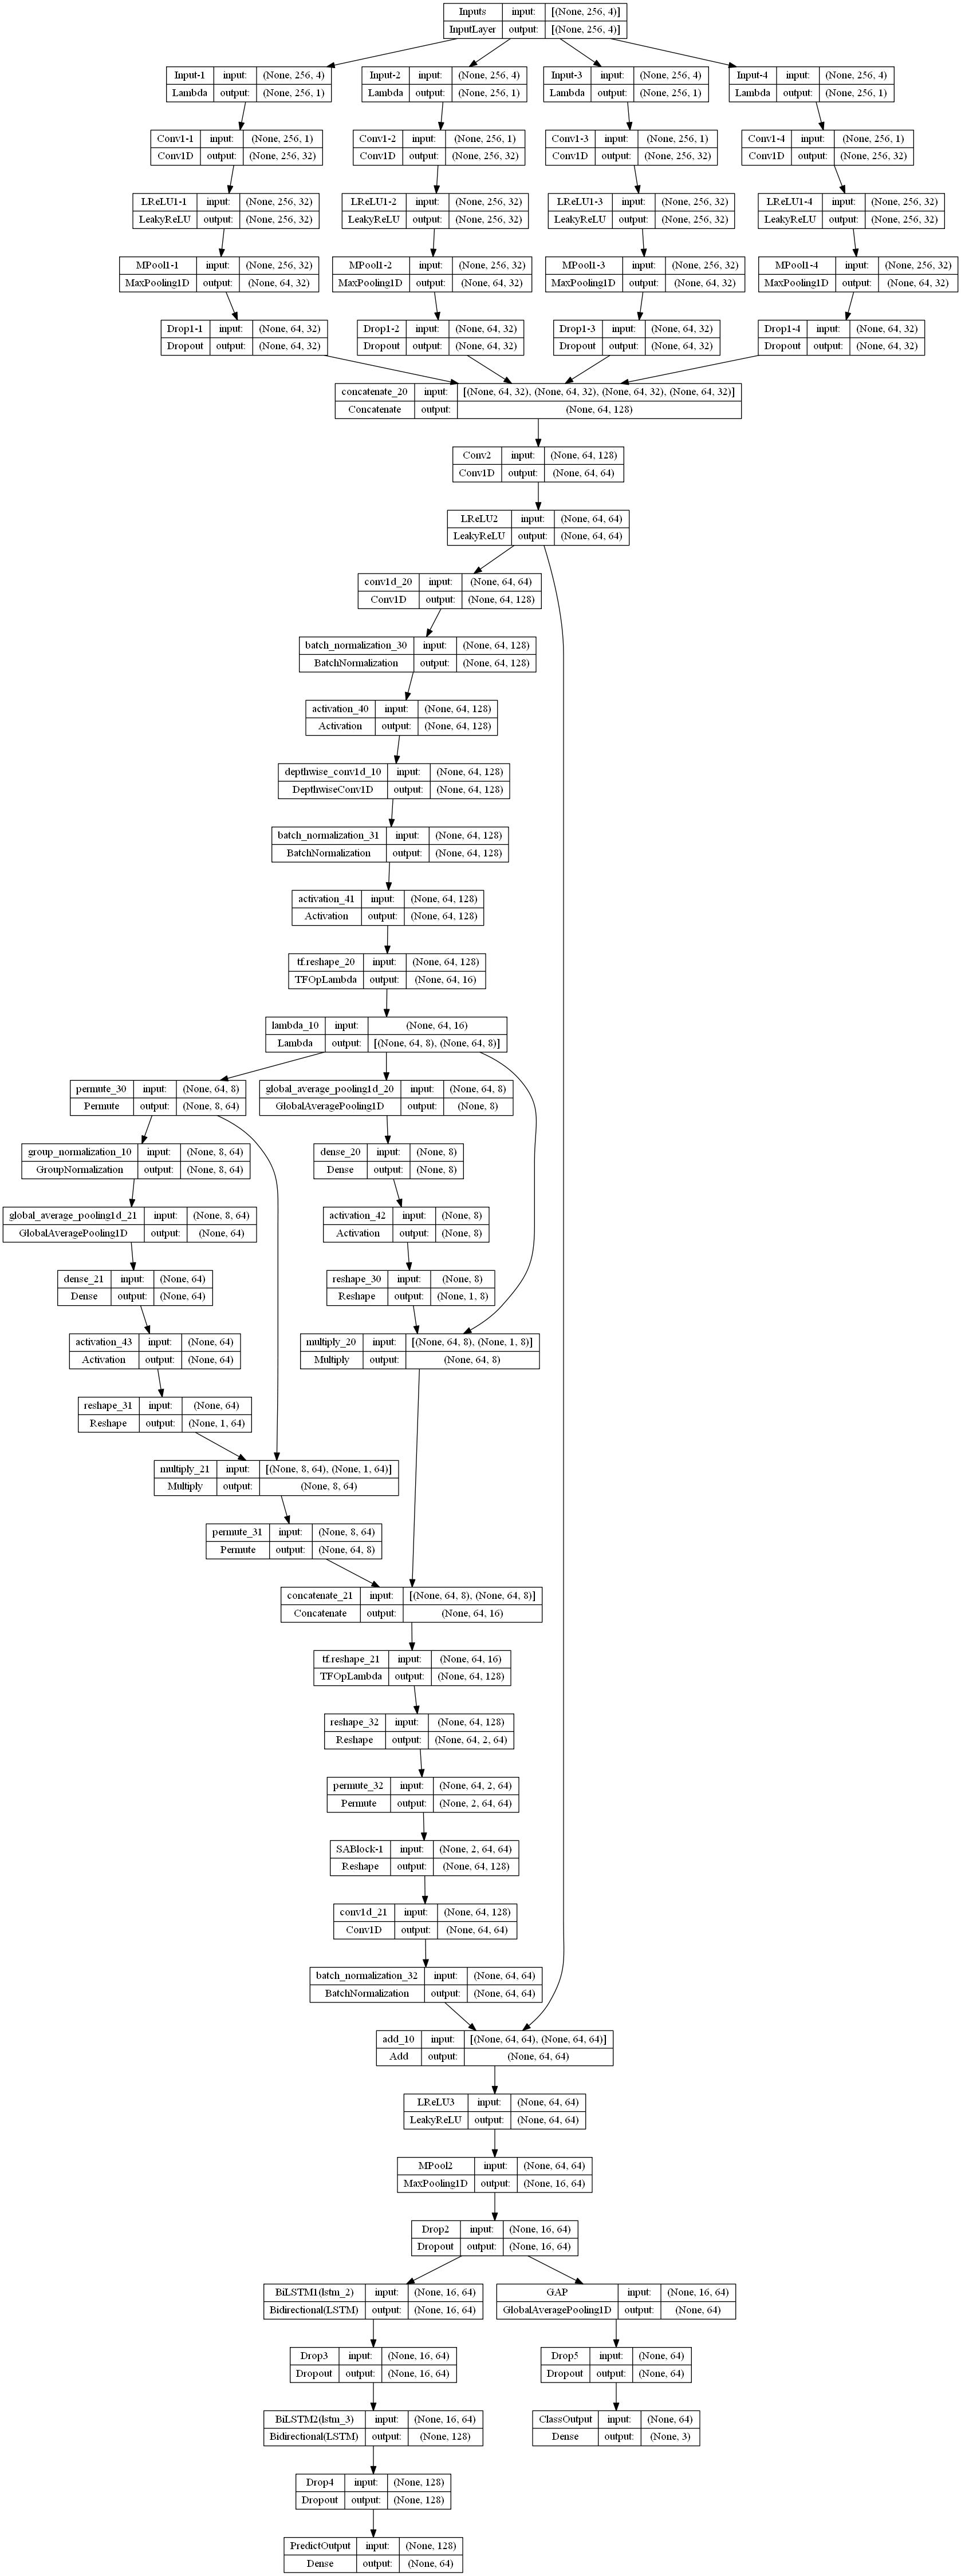

In [12]:
from models.CNNEMGNets import CNNEMGNets
modelType = 'CNN-BiLSTM' # One of ['CNN-LSTM', 'CNN-BiLSTM', 'CNN-GRU', 'CNN-BiGRU', 'CNN-TCN']
attention = 'SA' # One of ['None', 'SE', 'SA'].
model, modelName = CNNEMGNets(modelType, attention)
print('Summary of model-%s: '%modelName)
model.summary()
print('Calculate flops of model-%s: '%modelName)
if modelType in ['CNN-LSTM', 'CNN-BiLSTM', 'CNN-GRU', 'CNN-BiGRU']:
    cnn_flops = get_flops(model, batch_size=None)
    rnn_flops = get_rnn_flops(model, modelType)
    total_flops = cnn_flops+rnn_flops
    print('CNN FLOPS: ', cnn_flops, 'RNN FLOPS: ', rnn_flops, 'Total FLOPS: ', total_flops)
elif modelType == 'CNN-TCN':
    cnn_flops = get_flops(model, batch_size=None)
    total_flops = cnn_flops
    print('Total FLOPS: ', total_flops)
else:
    raise ValueError('Unsupported modelType!')
print(f"Total FLOPS: {total_flops / 10 ** 7:.04} G")
print('Visual architecture of model-%s: '%modelName)
path =  os.path.join(os.getcwd(), 'models', 'Visualization')
make_dir(path)
modelVisualization = os.path.join(path, ''.join([modelName,'.jpg']))
plot_model(model, to_file=modelVisualization, show_shapes=True)

Summary of model-Sinc-BiLSTM-SA: 
Model: "Sinc-BiLSTM-SA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Inputs (InputLayer)            [(None, 256, 4)]     0           []                               
                                                                                                  
 Input-1 (Lambda)               (None, 256, 1)       0           ['Inputs[0][0]']                 
                                                                                                  
 Input-2 (Lambda)               (None, 256, 1)       0           ['Inputs[0][0]']                 
                                                                                                  
 Input-3 (Lambda)               (None, 256, 1)       0           ['Inputs[0][0]']                 
                                                   

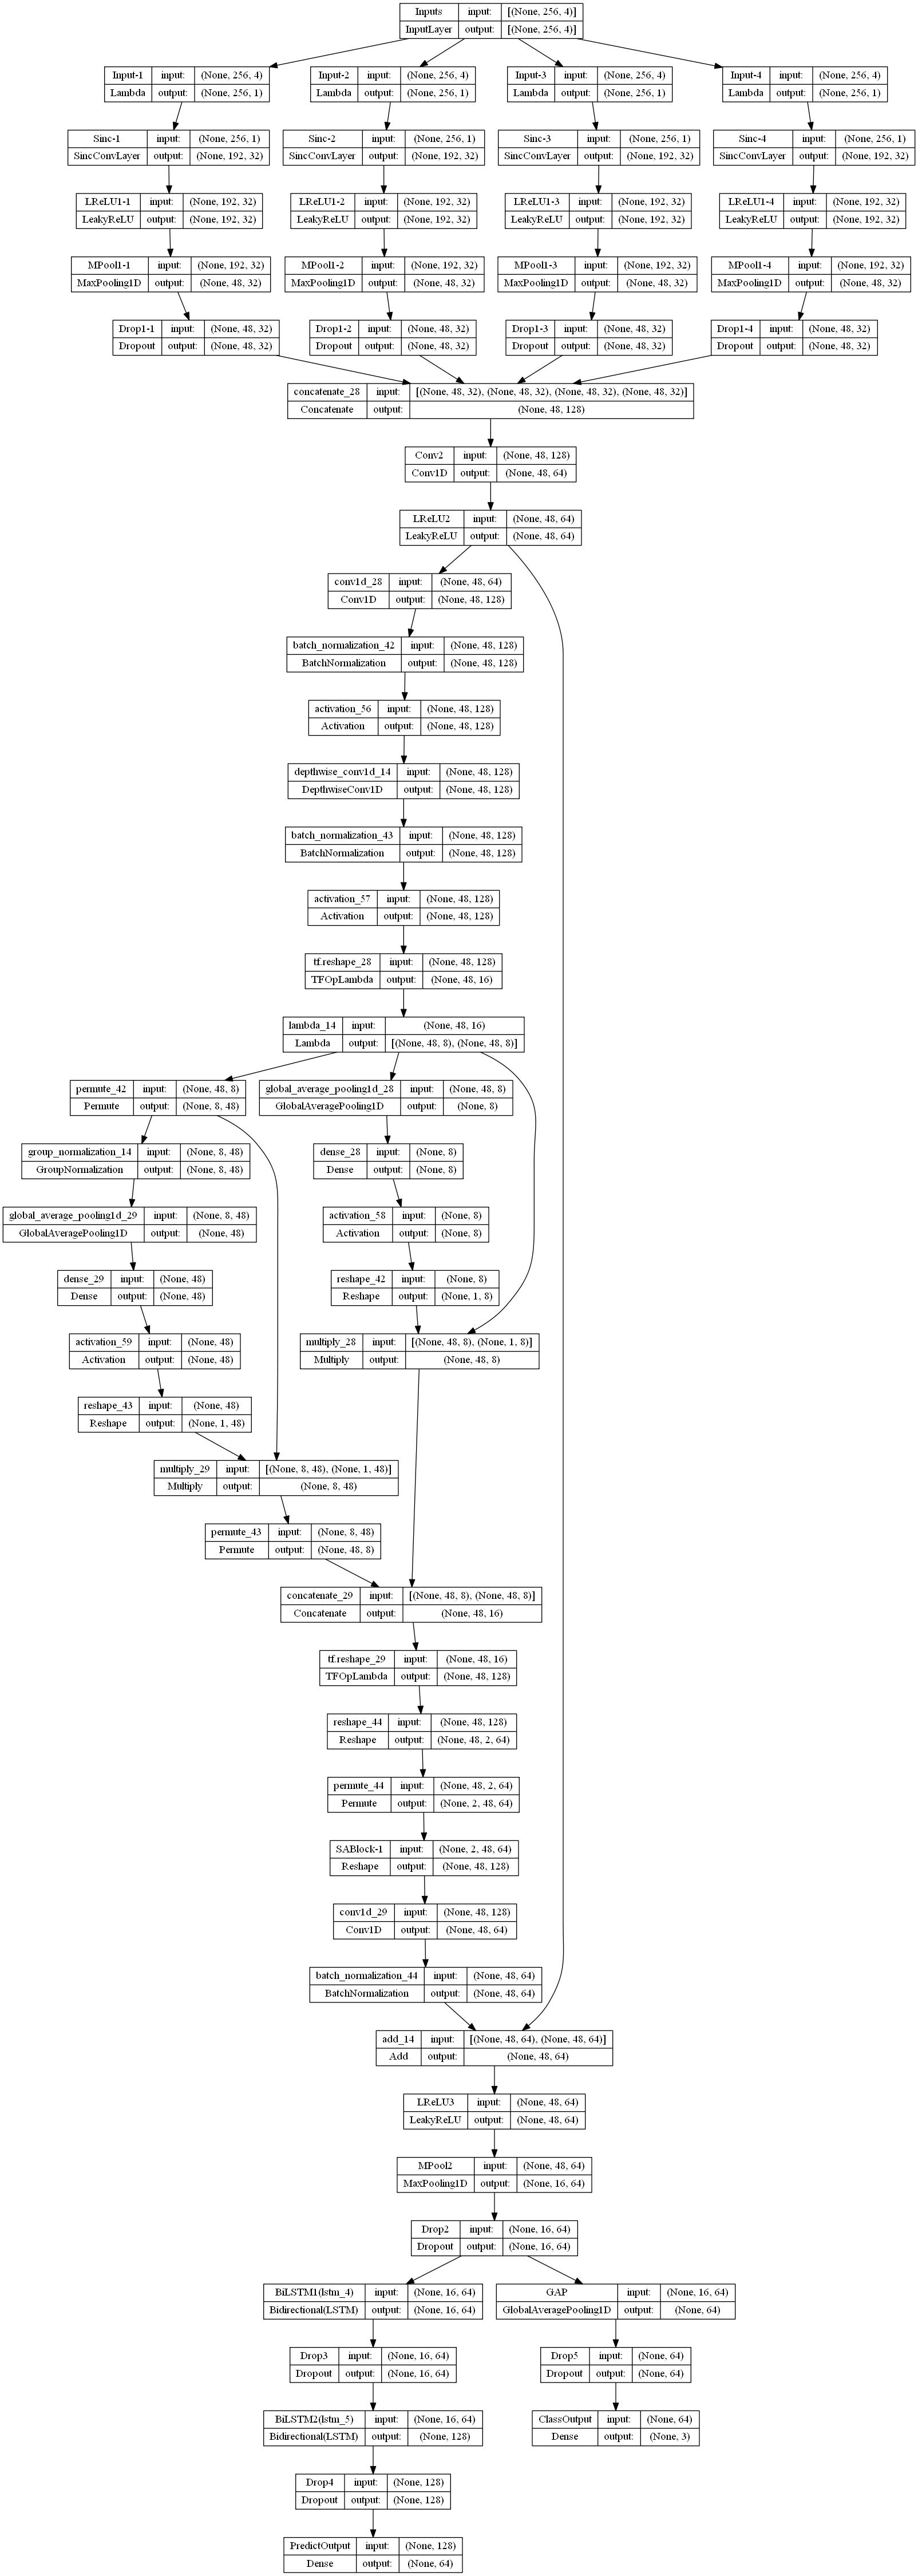

In [16]:
from models.SincEMGNets import SincEMGNets
modelType = 'Sinc-BiLSTM' # One of ['Sinc-LSTM', 'Sinc-BiLSTM', 'Sinc-GRU', 'Sinc-BiGRU', 'Sinc-TCN']
attention = 'SA' # One of ['None', 'SE', 'SA'].
model, modelName = SincEMGNets(modelType, attention)
print('Summary of model-%s: '%modelName)
model.summary()
if modelType in ['Sinc-LSTM', 'Sinc-BiLSTM', 'Sinc-GRU', 'Sinc-BiGRU']:
    cnn_flops = get_flops(model, batch_size=None)
    rnn_flops = get_rnn_flops(model, modelType)
    total_flops = cnn_flops+rnn_flops
    print('CNN FLOPS: ', cnn_flops, 'RNN FLOPS: ', rnn_flops, 'Total FLOPS: ', total_flops)
elif modelType == 'Sinc-TCN':
    cnn_flops = get_flops(model, batch_size=None)
    total_flops = cnn_flops
    print('Total FLOPS: ', total_flops)
else:
    raise ValueError('Unsupported modelType!')
print(f"Total FLOPS: {total_flops / 10 ** 7:.04} G")
print('Visual architecture of model-%s: '%modelName)
path =  os.path.join(os.getcwd(), 'models', 'Visualization')
make_dir(path)
modelVisualization = os.path.join(path, ''.join([modelName,'.jpg']))
plot_model(model, to_file=modelVisualization, show_shapes=True)

Summary of model-CNN2D: 
Model: "CNN2D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputs (InputLayer)         [(None, 256, 4, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 256, 4, 32)        704       
                                                                 
 activation_60 (Activation)  (None, 256, 4, 32)        0         
                                                                 
 pool1 (MaxPooling2D)        (None, 64, 4, 32)         0         
                                                                 
 dropout (Dropout)           (None, 64, 4, 32)         0         
                                                                 
 conv2 (Conv2D)              (None, 64, 4, 64)         30784     
                                                                 
 activation_61 (Activation)  (None, 

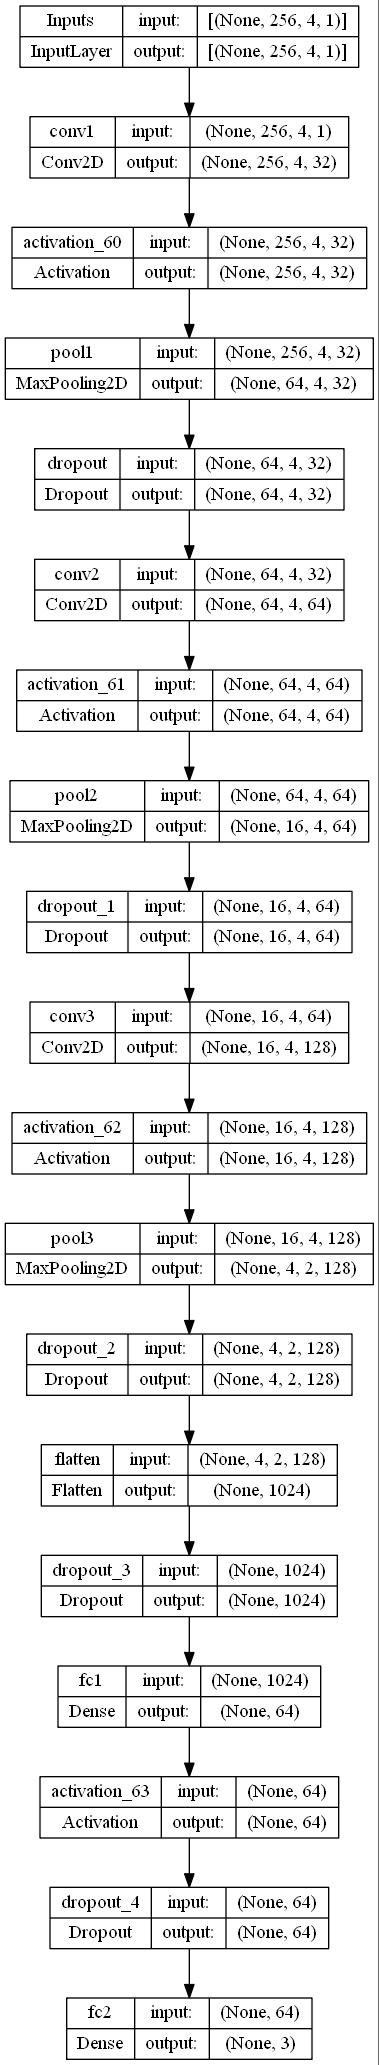

In [17]:
from models.CNN2D import CNN2D
model = CNN2D()
modelName = 'CNN2D'
print('Summary of model-%s: '%modelName)
model.summary()
print('Calculate flops of model-%s: '%modelName)
flops = get_flops(model, batch_size=None)
print('FLOPS: ', flops)
print(f"FLOPS: {flops / 10 ** 7:.04} G")
print('Visual architecture of model-%s: '%modelName)
path =  os.path.join(os.getcwd(), 'models', 'Visualization')
make_dir(path)
modelVisualization = os.path.join(path, ''.join([modelName,'.jpg']))
plot_model(model, to_file=modelVisualization, show_shapes=True)

Summary of model-ECN: 
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(32, 256, 4, 1)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (32, 256, 4, 32)     704         ['input_1[0][0]']                
                                                                                                  
 p_re_lu (PReLU)                (32, 256, 4, 32)     32768       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (32, 64, 4, 32)      0           ['p_re_lu[0][0]']                
                                                                       

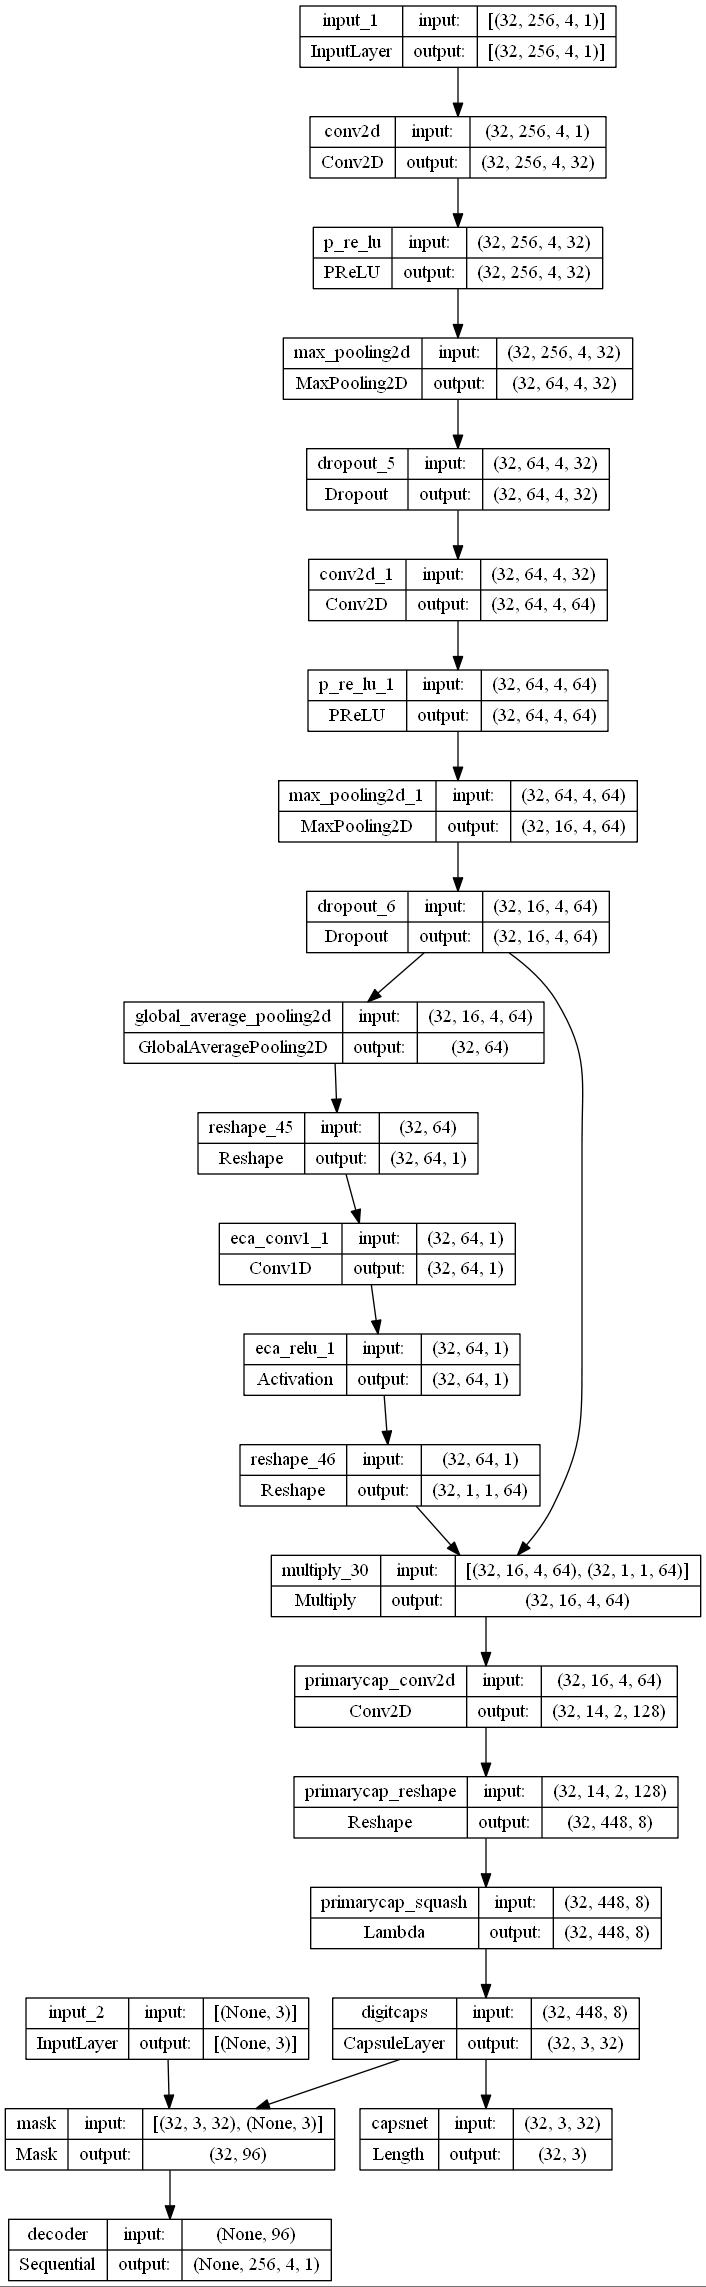

In [18]:
from models.ECN import ECN
train_model, eval_model, manipulate_model = ECN()
modelName = 'ECN'
print('Summary of model-%s: '%modelName)
train_model.summary()
print('Calculate flops of model-%s: '%modelName)
flops = get_flops(train_model, batch_size=None)
print('FLOPS: ', flops)
print(f"FLOPS: {flops / 10 ** 7:.04} G")
print('Visual architecture of model-%s: '%modelName)
path =  os.path.join(os.getcwd(), 'models', 'Visualization')
make_dir(path)
modelVisualization = os.path.join(path, ''.join([modelName,'.jpg']))
plot_model(train_model, to_file=modelVisualization, show_shapes=True)

Summary of model-VotingCNN1D: 
Model: "VotingCNN1D"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Inputs (InputLayer)            [(None, 256, 4)]     0           []                               
                                                                                                  
 reshape_47 (Reshape)           (None, 1024, 1)      0           ['Inputs[0][0]']                 
                                                                                                  
 conv1d_33 (Conv1D)             (None, 510, 128)     768         ['reshape_47[0][0]']             
                                                                                                  
 conv1d_39 (Conv1D)             (None, 510, 32)      192         ['reshape_47[0][0]']             
                                                         

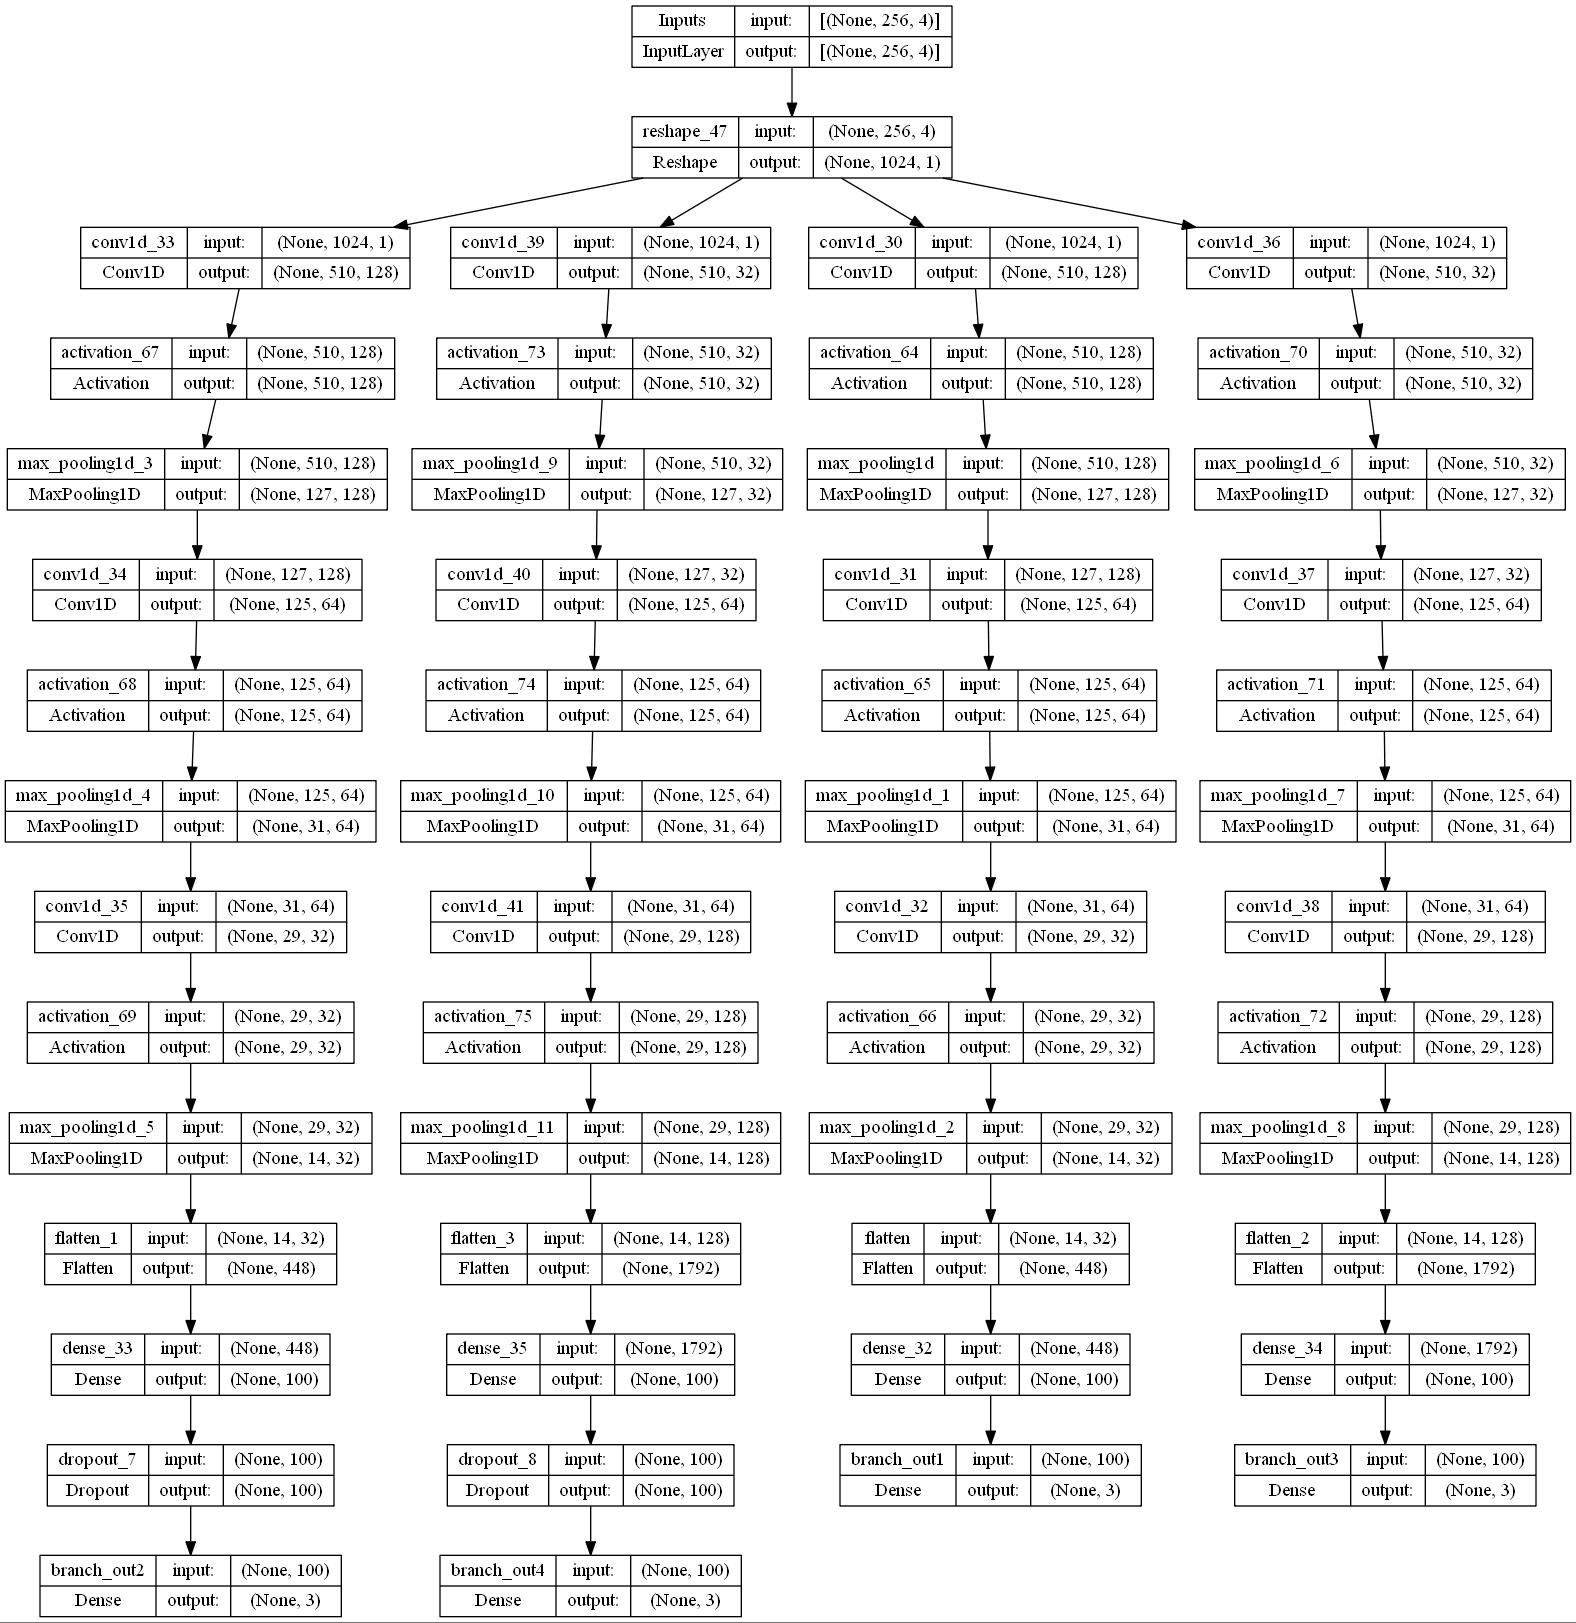

In [19]:
from models.VotingCNN1D import VotingCNN1D
model = VotingCNN1D()
modelName = 'VotingCNN1D'
print('Summary of model-%s: '%modelName)
model.summary()
print('Calculate flops of model-%s: '%modelName)
flops = get_flops(model, batch_size=None)
print('FLOPS: ', flops)
print(f"FLOPS: {flops / 10 ** 7:.04} G")
print('Visual architecture of model-%s: '%modelName)
path =  os.path.join(os.getcwd(), 'models', 'Visualization')
make_dir(path)
modelVisualization = os.path.join(path, ''.join([modelName,'.jpg']))
plot_model(model, to_file=modelVisualization, show_shapes=True)

Summary of model-LSTMModel: 
Model: "LSTMModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Inputs (InputLayer)            [(None, 256, 4)]     0           []                               
                                                                                                  
 Input-1 (Lambda)               (None, 256, 1)       0           ['Inputs[0][0]']                 
                                                                                                  
 Input-2 (Lambda)               (None, 256, 1)       0           ['Inputs[0][0]']                 
                                                                                                  
 Input-3 (Lambda)               (None, 256, 1)       0           ['Inputs[0][0]']                 
                                                             

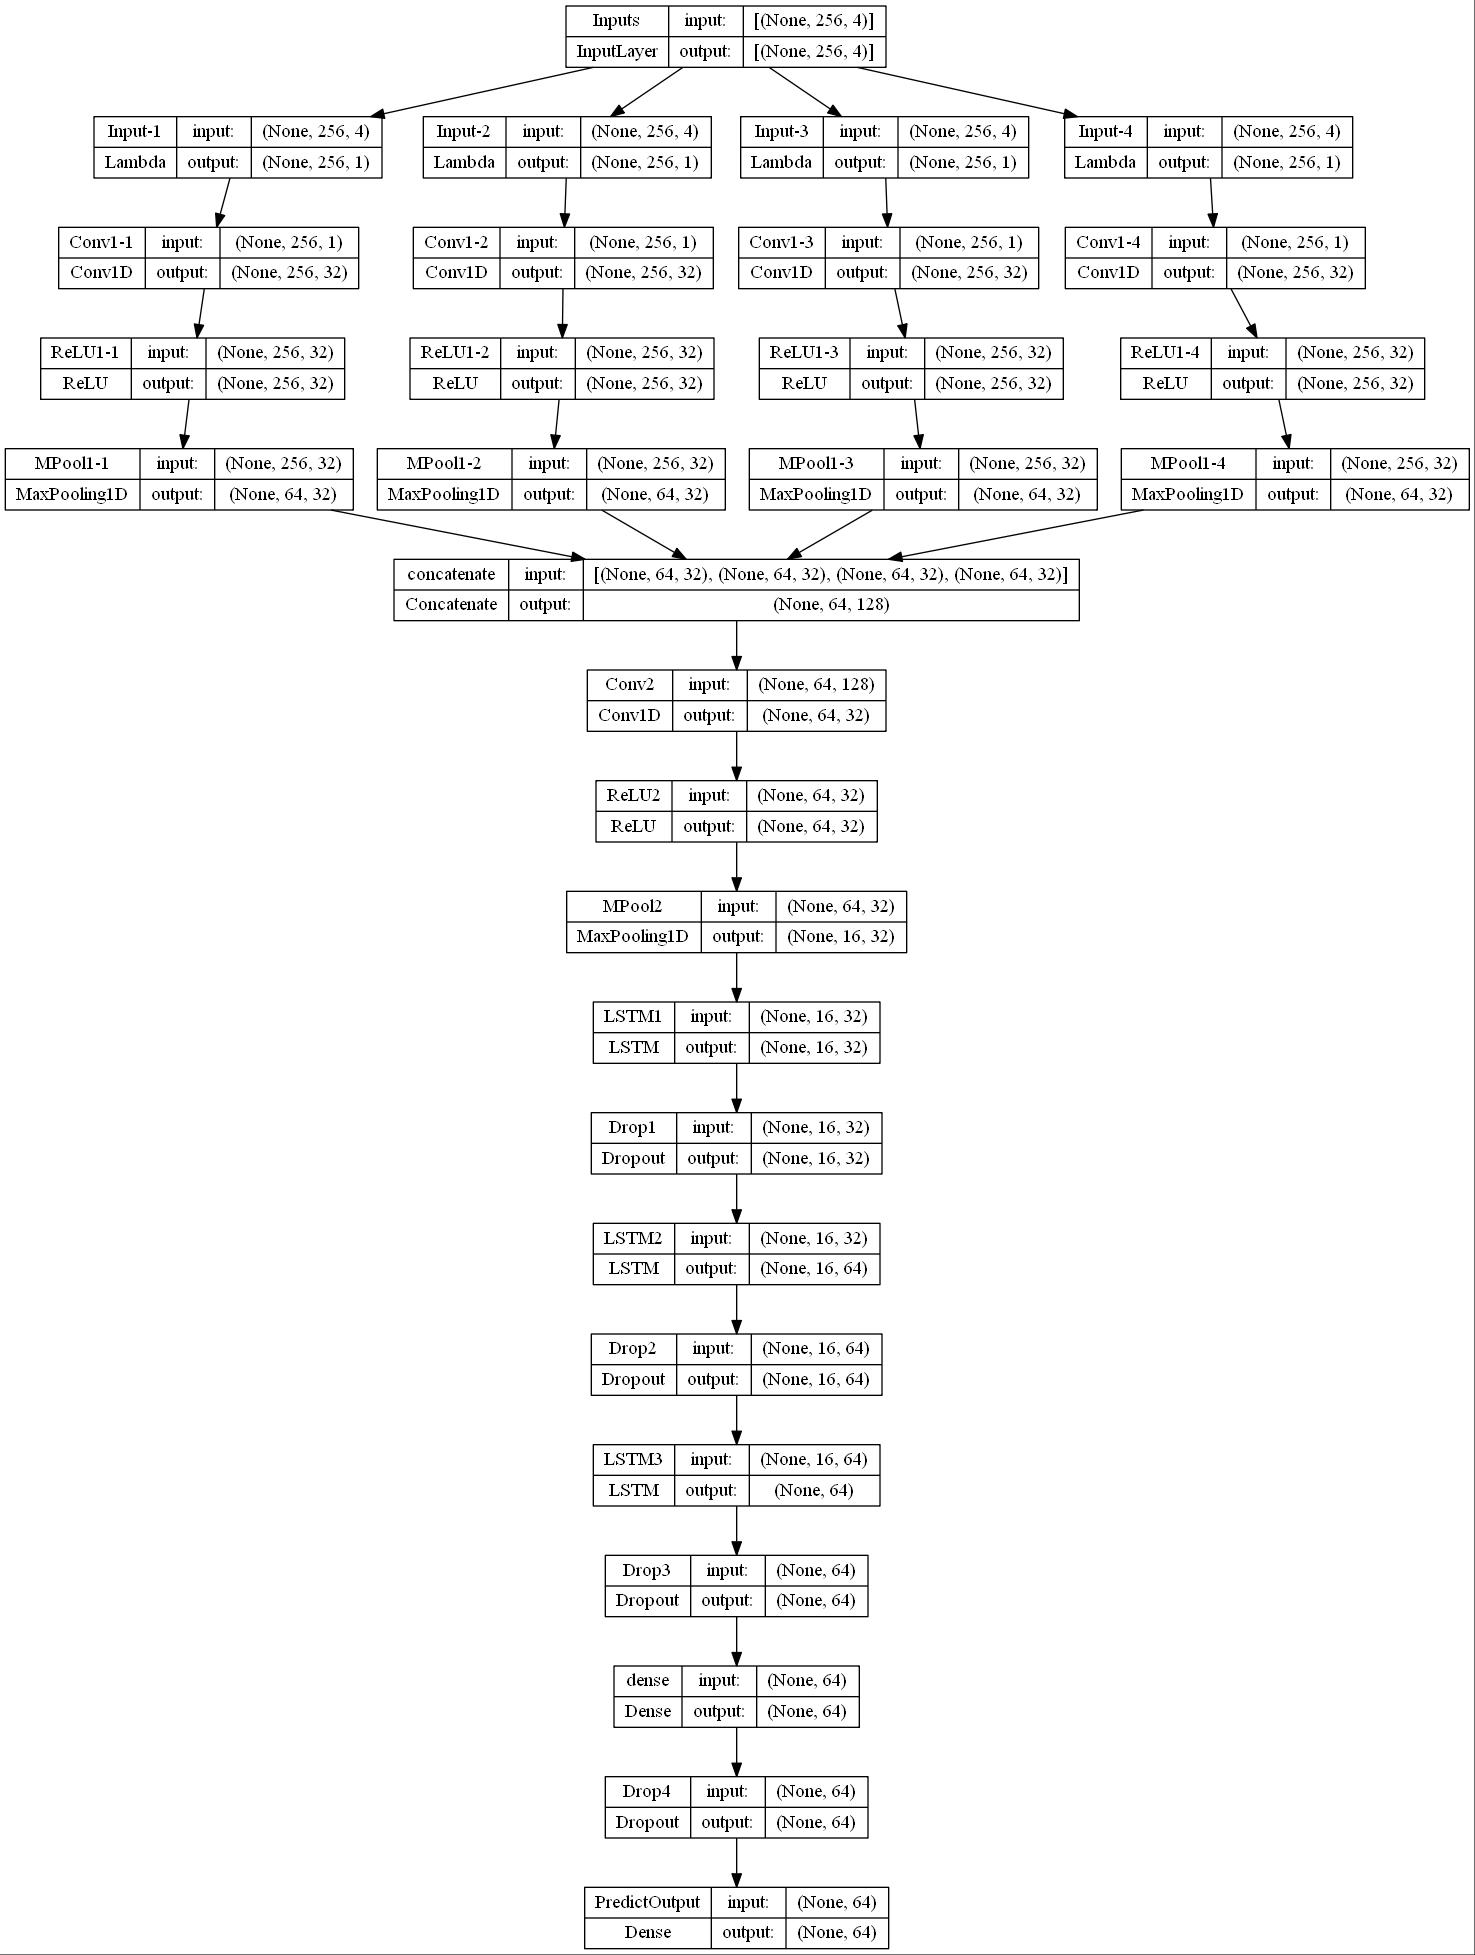

In [2]:
from models.LSTM import LSTMModel
model = LSTMModel()
modelName = 'LSTMModel'
print('Summary of model-%s: '%modelName)
model.summary()
print('Calculate flops of model-%s: '%modelName)
cnn_flops = get_flops(model, batch_size=None)
rnn_flops = get_rnn_flops(model, modelName)
total_flops = cnn_flops+rnn_flops
print('CNN FLOPS: ', cnn_flops, 'RNN FLOPS: ', rnn_flops, 'Total FLOPS: ', total_flops)
print(f"Total FLOPS: {total_flops / 10 ** 7:.04} G")
print('Visual architecture of model-%s: '%modelName)
path =  os.path.join(os.getcwd(), 'models', 'Visualization')
make_dir(path)
modelVisualization = os.path.join(path, ''.join([modelName,'.jpg']))
plot_model(model, to_file=modelVisualization, show_shapes=True)

Summary of model-MyoNet: 
Model: "MyoNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Inputs (InputLayer)            [(None, 256, 4)]     0           []                               
                                                                                                  
 Input-1 (Lambda)               (None, 256, 1)       0           ['Inputs[0][0]']                 
                                                                                                  
 Input-2 (Lambda)               (None, 256, 1)       0           ['Inputs[0][0]']                 
                                                                                                  
 Input-3 (Lambda)               (None, 256, 1)       0           ['Inputs[0][0]']                 
                                                                   

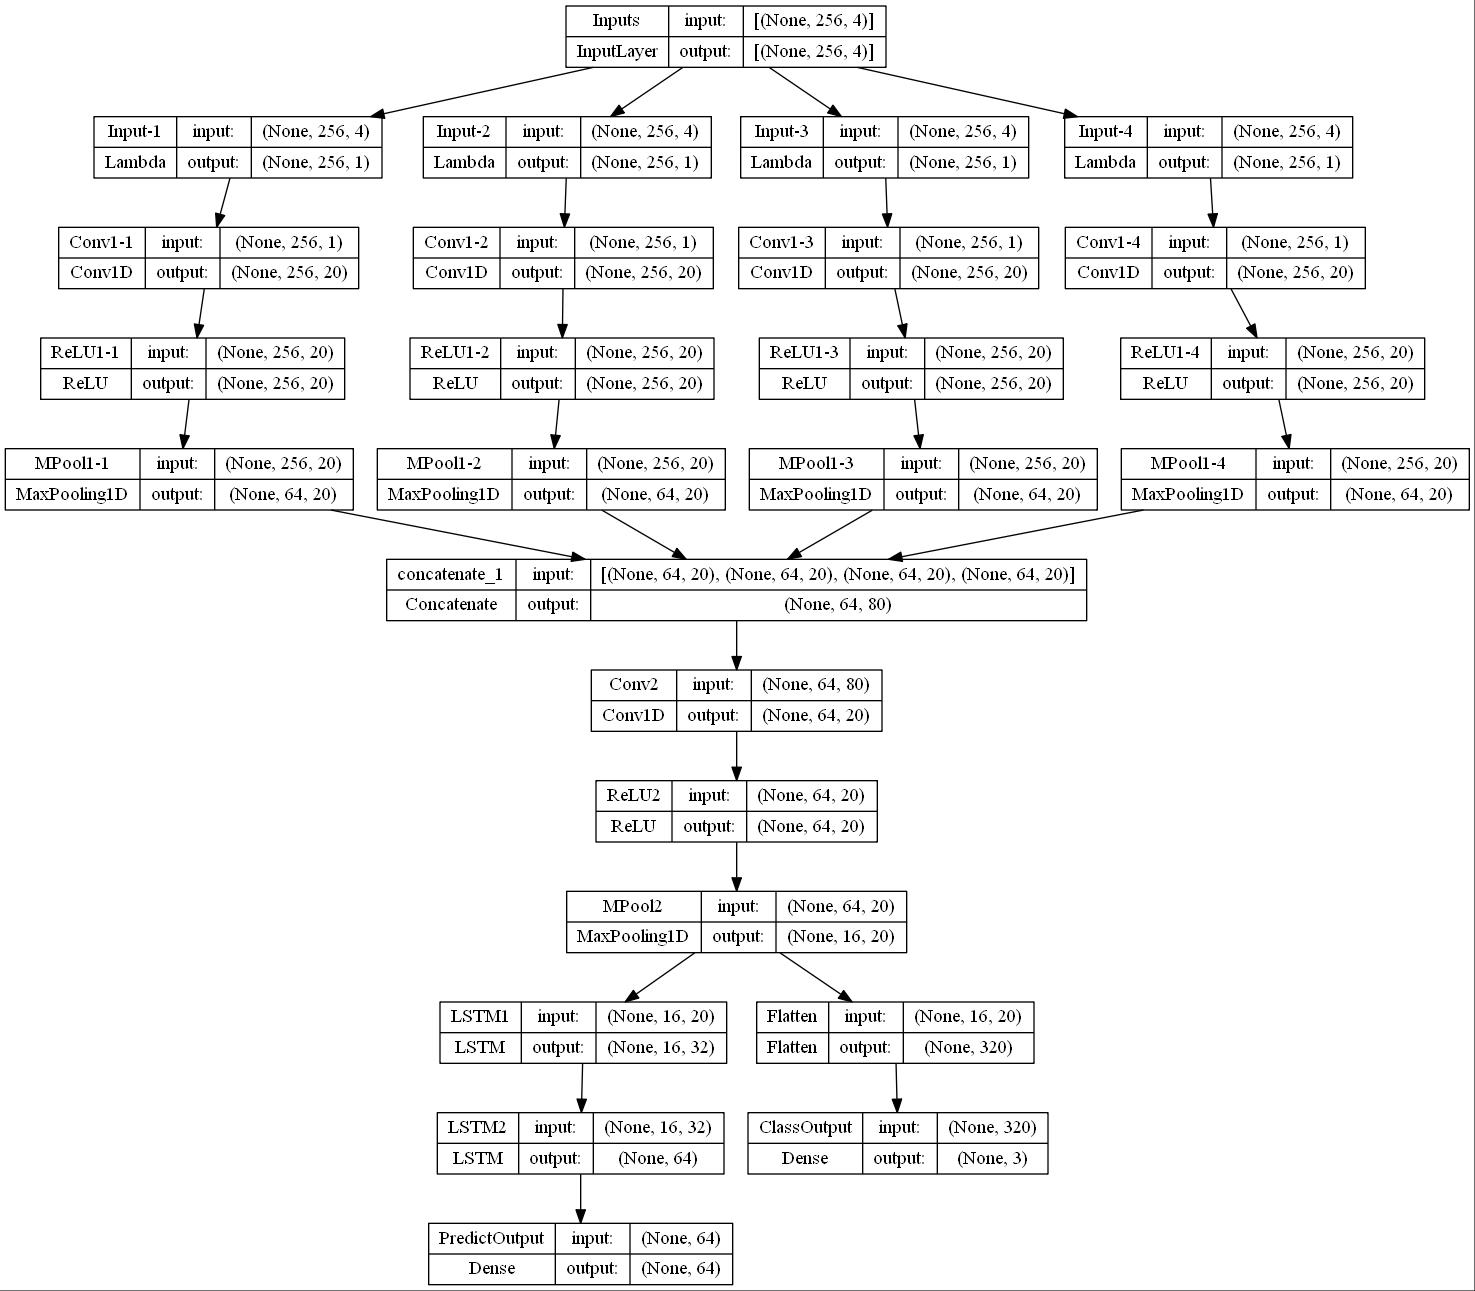

In [3]:
from models.MyoNet import MyoNet
model = MyoNet()
modelName = 'MyoNet'
print('Summary of model-%s: '%modelName)
model.summary()
print('Calculate flops of model-%s: '%modelName)
cnn_flops = get_flops(model, batch_size=None)
rnn_flops = get_rnn_flops(model, modelName)
total_flops = cnn_flops+rnn_flops
print('CNN FLOPS: ', cnn_flops, 'RNN FLOPS: ', rnn_flops, 'Total FLOPS: ', total_flops)
print(f"Total FLOPS: {total_flops / 10 ** 7:.04} G")
print('Visual architecture of model-%s: '%modelName)
path =  os.path.join(os.getcwd(), 'models', 'Visualization')
make_dir(path)
modelVisualization = os.path.join(path, ''.join([modelName,'.jpg']))
plot_model(model, to_file=modelVisualization, show_shapes=True)
plot_model(model, to_file=modelVisualization, show_shapes=True)